## Шаг 1. Изучение данных из файла

In [1]:
# импорт библиотек
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 
from scipy import stats as st 

In [2]:
# чтение файла с данными и сохранение в df
try:
    df = pd.read_csv('/datasets/games.csv') 
except FileNotFoundError:
    print('файл или директория не существует!')  

In [3]:
# функция получения информации
def get_info(name, df): 
    print('\033[1m' + 'Первые 5 строк таблицы: ' + name + '\033[0m')
    display(df.head())
    print()
    print('\033[1m' + 'Сводная информация о таблице: ' + name + '\033[0m')
    print()
    df.info()
    print()
    print('\033[1m' + 'Описательная статистика таблицы: ' + name + '\033[0m')
    display(df.describe())
    print()
    print('\033[1m' + 'Описательная статистика таблицы: ' + name + '\033[0m')
    display(df.describe(include=[object]))
    print()
    print('\033[1m' + 'Пропуски в таблице: ' + name + '\033[0m')
    report = df.isna().sum().to_frame()
    report = report.rename(columns = {0: 'missing_values'})
    report['% of total'] = (100 * report['missing_values'] / df.shape[0]).round(2)
    display(report.sort_values(by = 'missing_values', ascending = False))
    print()
    print('\033[1m' + 'Дубликатов в таблице ' + name + '\033[0m'':', df.duplicated().sum())
    print()

In [4]:
# получаем информацию по таблицам
dict_df = {'Игры': df} 
for dfd in dict_df:
    get_info(dfd, dict_df[dfd])

Первые 5 строк таблицы: Игры


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



Сводная информация о таблице: Игры

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Описательная статистика таблицы: Игры


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



Описательная статистика таблицы: Игры


,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990



Пропуски в таблице: Игры


,missing_values,% of total
Critic_Score,8578,51.32
Rating,6766,40.48
User_Score,6701,40.09
Year_of_Release,269,1.61
Name,2,0.01
Genre,2,0.01
Platform,0,0.00
NA_sales,0,0.00
EU_sales,0,0.00
JP_sales,0,0.00



Дубликатов в таблице Игры: 0



In [5]:
display(df[df['Name'].isna()]) # выводим на экран данные с играми без названий

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
df['Genre'].unique() # выводим на экран уникальные название жанров

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [7]:
df['Rating'].unique()  # выводим на экран уникальные название рейтинга

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [8]:
df['Platform'].unique()  # выводим на экран уникальные название платформ

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

При изучении файла выявлены ошибки:

- Названия всех столбцов с большой буквы. Приведём к нижнему регистру.
- Name, Genre - есть пропуски. Удалим строки с пропусками.
- Year_of_Release — есть пропуски. Оставим без изменений.
- Critic_Score — есть пропуски. 
- User_Score — есть пропуски, tbd - to be determined значение еще не определено.
- Rating — есть пропуски.

Перед анализом нужно предобработать данные.

## Шаг 2. Предобработка данных

### Стиль заголовков

In [9]:
print(df.columns) # выводим название столбцов на экран
df.columns = [col.lower() for col in df.columns] # приводи название столбцов к нижнему регистру
print(df.columns) # выводим название столбцов на экран

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Пропуски значений

In [10]:
print(df['name'].isna().sum()) # подсчёт пропусков в столбце name
df.dropna(subset = ['name'], inplace = True)
print(df['name'].isna().sum()) # подсчёт пропусков в столбце name

2
0


In [11]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan') # заменяем tbd на nan

In [12]:
df['user_score'] = df['user_score'].astype('float') # меняем тип даных на float

In [13]:
df['rating'] = df['rating'].fillna('NA') # пропуски меняем на 'NA'

### Суммарные продажи во всех регионах

In [14]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] # создаём столбец sum_sales с суммарными продажами во всех региона

**Вывод**

- Заменены названия столбцов (приведите к нижнему регистру).
- Удалены строки с пропущеными названиями игр.
- tbd - to be determined значение еще не определено заменили на nan
- Столбец user_score заменили на тип float
- Пропуски в столбце rating заменили на 'NA'
- Создали столбец с  суммарными продажами во всех регионах  sum_saales

## Шаг 3. Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

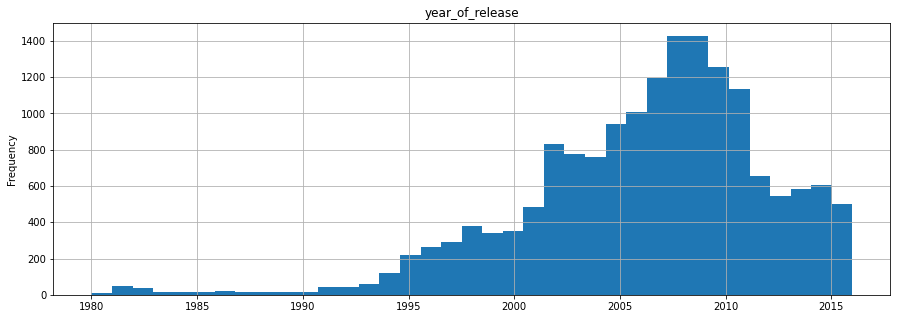

In [15]:
df['year_of_release'].plot(kind = 'hist',bins = 37, title ='year_of_release', grid = True, figsize=(15,5)) # строим гисторграмму
plt.show()

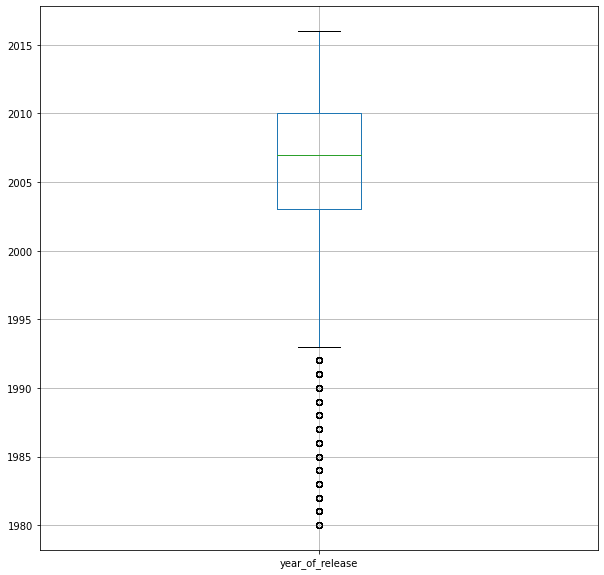

In [16]:
df.boxplot(column ='year_of_release',  figsize=(10,10)) # строим графико распределения данных
plt.show()

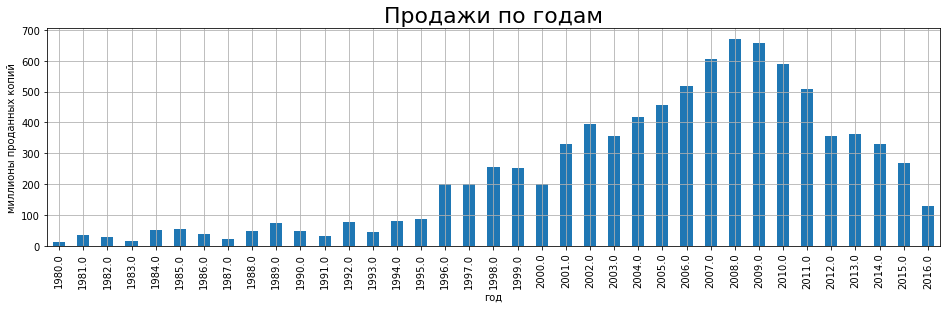

In [17]:
df.groupby('year_of_release')['sum_sales'].sum().plot(x='year_of_release', y=df.groupby('year_of_release')['sum_sales'].sum(), kind='bar', figsize=(16,4), grid = True) # строим столбчатую диаграмму
plt.title('Продажи по годам', fontsize=22) # задаём название графика
plt.xlabel('год') # задаём подпись горизонтальной оси
plt.ylabel('миллионы проданных копий') # задаём подпись вертикальной оси
plt.show() # показываем график   

In [18]:
df93 = df.query('year_of_release >= 1993') # сделаем срез по 1993 году

**Вывод**

До 1993 года выпускалось заметно меньше игр чем после, данные до 1993 года не важны и в дальнейших исследования их не используем.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [19]:
top = df93.groupby('platform').agg({'sum_sales': 'sum'}).sort_values(by = 'sum_sales').tail(10).index # создаём рейтинг платформ

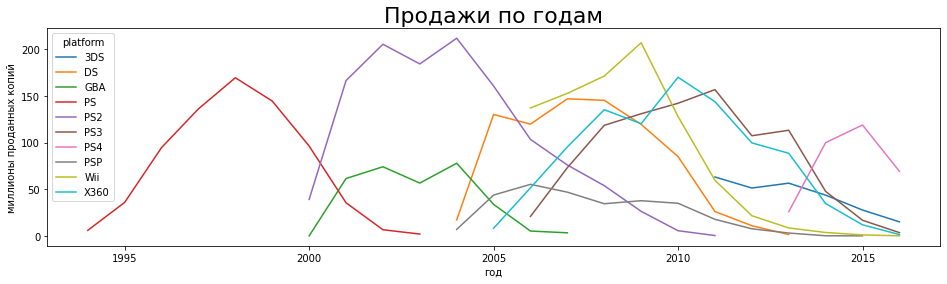

In [20]:
df93.query('platform in @top').pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot(figsize=(16,4)) # строим графиги продажи по годама
plt.title('Продажи по годам', fontsize=22) # задаём название графика 
plt.xlabel('год') # задаём подпись горизонтальной оси
plt.ylabel('миллионы проданных копий') # задаём подпись вертикальной оси
plt.show() # показываем график 

In [21]:
count_sum = 0 # создаём переменную
for platform in top: # создаём цикл    
    count_sum += df93[df93['platform'] == platform].groupby('year_of_release')['sum_sales'].sum().count() # суммируем года когда были продажи 
print('Появляются новые и исчезают старые платформы в среднем за', (count_sum/10).astype(int), 'лет') # выводми на экран среднее

Появляются новые и исчезают старые платформы в среднем за 9 лет


### Возьмите данные за соответствующий актуальный период. Не учитывайте в работе данные за предыдущие годы.

In [22]:
df8 = df.query('year_of_release >= 2008')

**Вывод**

Так как появляются новые и исчезают старые платформы в среднем за 9 лет, актуальный период будем считать с 2008 года.

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [23]:
top_10 = df8.groupby('platform').agg({'sum_sales': 'sum'}).sort_values(by = 'sum_sales').tail(10).index # создаём рейтинг платформ с 2008 года

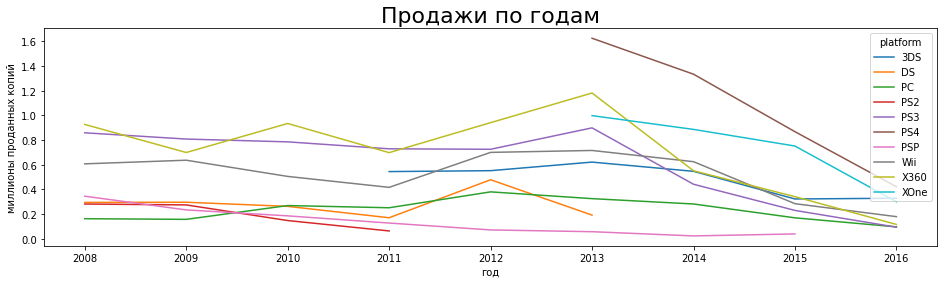

In [24]:
df8.query('platform in @top_10').pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'mean').plot(figsize=(16,4)) # строим графиги продажи по годама
plt.title('Продажи по годам', fontsize=22) # задаём название графика 
plt.xlabel('год') # задаём подпись горизонтальной оси
plt.ylabel('миллионы проданных копий') # задаём подпись вертикальной оси
plt.show() # показываем график  

**Вывод**

В последнее время по продажам лидируют PS4 и XOne, c 2008 года по всем платформам продажи падают, потенциально прибыльные пока остаются лидеры PS4 и XOne.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат

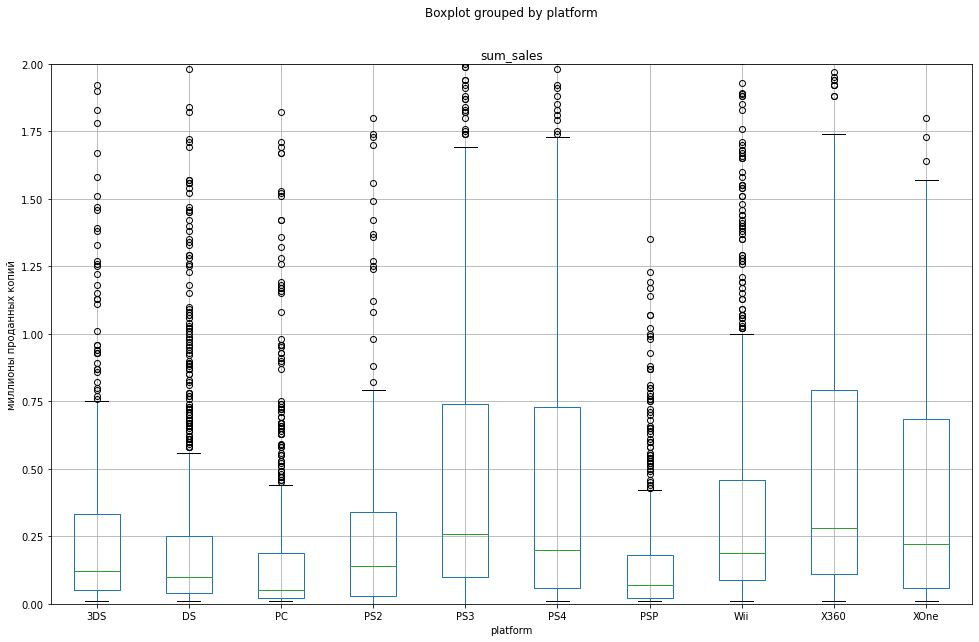

In [25]:
df8.query('platform in @top_10').boxplot(column ='sum_sales', by = 'platform', figsize=(16,10)) # строим графико распределения данных по платформам
plt.ylabel('миллионы проданных копий') # задаём подпись вертикальной оси
plt.ylim(0, 2) # обрезаме график по вертикали
plt.show() # показываем график 

**Вывод**

За последние 9 лет лидеры продаж PS3 и X360 их догоняют более новые платформы PS4 и XOne.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

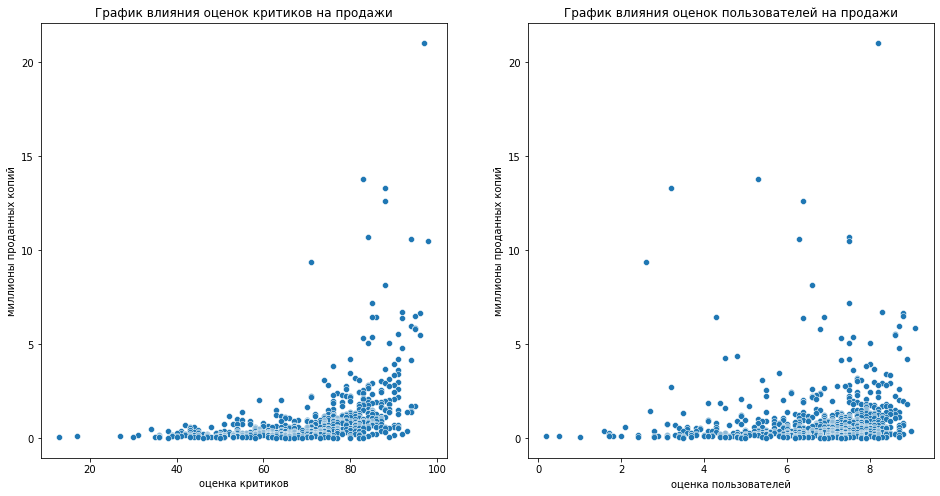

Коррелция  между отзывами критиков и продажами 0.4337315172826896
Коррелция  между отзывами пользователей и продажами 0.11507962414430672


In [26]:
plt.figure(figsize=(16, 8)) # задаём размер графиков
plt.subplot(121) # устанавливаем подокно графика    
sns.scatterplot(data=df8.query('platform == "PS3"'), x='critic_score', y='sum_sales') # строим диаграмму рассеиния
plt.title('График влияния оценок критиков на продажи') # задаём название графика    
plt.xlabel('оценка критиков') # задаём подпись горизонтальной оси
plt.ylabel('миллионы проданных копий') # задаём подпись вертикальной оси
plt.subplot(122) # устанавливаем подокно графика    
sns.scatterplot(data=df8.query('platform == "PS3"'), x='user_score', y='sum_sales') # строим диаграмму рассеиния
plt.title('График влияния оценок пользователей на продажи') # задаём название графика  
plt.xlabel('оценка пользователей') # задаём подпись горизонтальной оси
plt.ylabel('миллионы проданных копий') # задаём подпись вертикальной оси
plt.show() # показываем график
print('Коррелция  между отзывами критиков и продажами', df8.query('platform == "PS3"')['critic_score'].corr(df['sum_sales'])) # выводим на экран корреляцию
print('Коррелция  между отзывами пользователей и продажами', df8.query('platform == "PS3"')['user_score'].corr(df['sum_sales'])) # выводим на экран корреляцию

**Вывод**

Отзывы критиков влияют на продажи, отзывы пользователей почти не влияют на продажи PS3.

### Соотнесите выводы с продажами игр на других платформах

In [27]:
for index in top_10: # создаём цикл
    print('Платформа:', index) # выводим на экран название платформы
    print('Коррелция  между отзывами критиков и продажами', df8.query('platform == @index')['critic_score'].corr(df['sum_sales'])) # выводим на экран корреляцию
    print('Коррелция  между отзывами пользователей и продажами', df8.query('platform == @index')['user_score'].corr(df['sum_sales'])) # выводим на экран корреляцию
    

Платформа: PS2
Коррелция  между отзывами критиков и продажами 0.34483115443912876
Коррелция  между отзывами пользователей и продажами 0.1223723901293979
Платформа: PSP
Коррелция  между отзывами критиков и продажами 0.33468103952904893
Коррелция  между отзывами пользователей и продажами 0.21656156902299614
Платформа: PC
Коррелция  между отзывами критиков и продажами 0.2974609078144443
Коррелция  между отзывами пользователей и продажами -0.01865012471759223
Платформа: XOne
Коррелция  между отзывами критиков и продажами 0.4169983280084017
Коррелция  между отзывами пользователей и продажами -0.06892505328279414
Платформа: 3DS
Коррелция  между отзывами критиков и продажами 0.3487397305984834
Коррелция  между отзывами пользователей и продажами 0.22207843643390882
Платформа: PS4
Коррелция  между отзывами критиков и продажами 0.40656790206178095
Коррелция  между отзывами пользователей и продажами -0.031957110204556424
Платформа: DS
Коррелция  между отзывами критиков и продажами 0.3071390920453

**Вывод**

По остальным платформам выводы почти совпадают, отзывы критиков влияют на продажи, отзывы пользователей почти не влияют на продажи. У PC, PS4, XOne корреляция между отзывами пользователей и продажами отрицательная.  

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

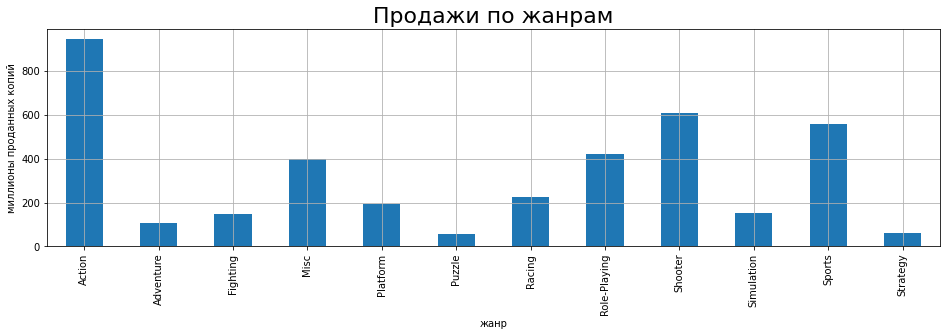

In [28]:
df8.groupby('genre')['sum_sales'].sum().plot(x='year_of_release', y=df.groupby('genre')['sum_sales'].sum(), kind='bar', figsize=(16,4), grid = True) # строим столбчатую диаграмму
plt.title('Продажи по жанрам', fontsize=22) # задаём название графика
plt.xlabel('жанр') # задаём подпись горизонтальной оси
plt.ylabel('миллионы проданных копий') # задаём подпись вертикальной оси
plt.show() # показываем график  

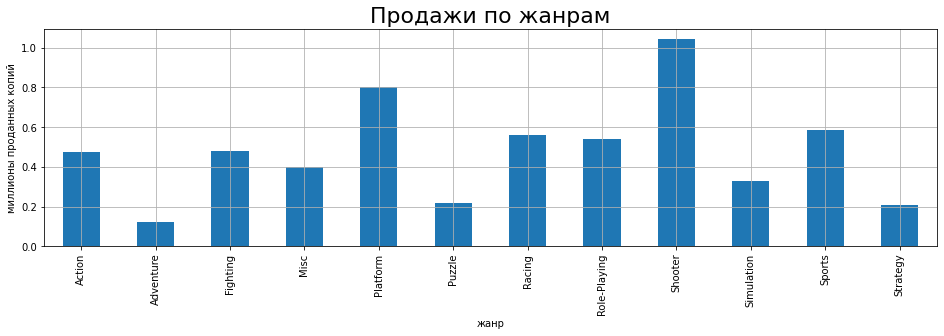

In [29]:
df8.groupby('genre')['sum_sales'].mean().plot(x='year_of_release', y=df.groupby('genre')['sum_sales'].sum(), kind='bar', figsize=(16,4), grid = True) # строим столбчатую диаграмму
plt.title('Продажи по жанрам', fontsize=22) # задаём название графика
plt.xlabel('жанр') # задаём подпись горизонтальной оси
plt.ylabel('миллионы проданных копий') # задаём подпись вертикальной оси
plt.show() # показываем график  

**Вывод**

Самый популярный жанр Action он сильно выделяется от остальных жанров, самые низкие продажи у Puzzle и Strategy.

## Шаг 4. Составьте портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

In [30]:
top_na = df8.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by = 'na_sales',  ascending = False) # создаём рейтинг платформ Северной Америки 
top_na['ratio %'] = (top_na['na_sales']/top_na['na_sales'].sum())*100 # созаём столбцец ratio % доля от всех продаж
display(top_na.head()) # выводи топ-5 на экран

,na_sales,ratio %
platform,,
X360,490.69,27.040476
PS3,349.13,19.239523
Wii,332.87,18.343482
DS,198.73,10.951423
PS4,108.74,5.992340


In [31]:
top_eu = df8.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by = 'eu_sales',  ascending = False) # создаём рейтинг платформ Европы 
top_eu['ratio %'] = (top_eu['eu_sales']/top_eu['eu_sales'].sum())*100 # созаём столбцец ratio % доля от всех продаж
display(top_eu.head()) # выводим топ-5 на экран

,eu_sales,ratio %
platform,,
PS3,293.73,24.269390
X360,234.88,19.406919
Wii,170.74,14.107363
PS4,141.09,11.657537
PC,92.17,7.615530


In [32]:
top_jp = df8.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by = 'jp_sales',  ascending = False) # создаём рейтинг платформ Японии 
top_jp['ratio %'] = (top_jp['jp_sales']/top_jp['jp_sales'].sum())*100 # созаём столбцец ratio % доля от всех продаж
display(top_jp.head()) # выводим топ-5 на экран

,jp_sales,ratio %
platform,,
3DS,100.62,23.548961
DS,76.12,17.815016
PS3,74.11,17.344598
PSP,60.46,14.149972
Wii,47.01,11.002153


**Вывод**

Самая популярная платформа в Северной Америке X360 27% от всех продаж, в Европе PS3 24%  от всех продаж, в Японии 3DS 23% от всех продаж.

### Самые популярные жанры (топ-5) 

In [33]:
top_na = df8.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by = 'na_sales',  ascending = False) # создаём рейтинг жанров Северной Америки 
top_na['ratio %'] = (top_na['na_sales']/top_na['na_sales'].sum())*100 # созаём столбцец ratio % доля от всех продаж
display(top_na.head()) # выводим топ-5 на экран

,na_sales,ratio %
genre,,
Action,433.74,23.902130
Shooter,311.26,17.152619
Sports,276.27,15.224423
Misc,211.61,11.661202
Role-Playing,155.81,8.586229


In [34]:
top_eu = df8.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by = 'eu_sales',  ascending = False) # создаём рейтинг жанров Европы
top_eu['ratio %'] = (top_eu['eu_sales']/top_eu['eu_sales'].sum())*100 # созаём столбцец ratio % доля от всех продаж
display(top_eu.head()) # выводим топ-5 на экран

,eu_sales,ratio %
genre,,
Action,310.59,25.662445
Shooter,208.35,17.214882
Sports,185.19,15.301291
Misc,107.00,8.840856
Role-Playing,94.46,7.804741


In [35]:
top_jp = df8.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by = 'jp_sales',  ascending = False) # создаём рейтинг жанров Японии 
top_jp['ratio %'] = (top_jp['jp_sales']/top_jp['jp_sales'].sum())*100 # созаём столбцец ratio % доля от всех продаж
display(top_jp.head()) # выводим топ-5 на экран

,jp_sales,ratio %
genre,,
Role-Playing,138.12,32.325407
Action,90.16,21.100917
Misc,37.33,8.736660
Sports,30.69,7.182644
Adventure,23.36,5.467141


**Вывод**

Самый популярный жанр в Северной Америке и Европе Action, в Японии Role-Playing. Япония густонаселённая страна с маленькой территорией, японцам хочется побегать по открытому миру Role-Playing игр, Американцы и Европейцы любят пострелять.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [36]:
df8.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by = 'na_sales',  ascending = False) # группируем продажи в Северной Америке по рейтингу ESRB 

,na_sales
rating,
E,536.93
M,502.60
T,303.41
E10+,251.88
NA,218.51
EC,1.32
RP,0.00


In [37]:
df8.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by = 'eu_sales',  ascending = False) # группируем продажи в Европе по рейтингу ESRB 

,eu_sales
rating,
M,362.65
E,326.61
NA,188.85
T,187.62
E10+,144.53
RP,0.03
EC,0.00


In [38]:
df8.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by = 'jp_sales',  ascending = False) # группируем продажи в Японии по рейтингу ESRB 

,jp_sales
rating,
NA,220.60
E,77.17
T,64.51
M,39.33
E10+,25.67
EC,0.00
RP,0.00


**Вывод**

В Северной Америке и Японии не продают игры без рейтинга ESRB (RP). В Европе и Японии не продают игры для детей младшего возраста (EC).

## Шаг 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [39]:
alpha = 0.05 # задаём пороговое значение
results = st.ttest_ind(df8.query('platform == "XOne" & user_score != "nan"')['user_score'], df8.query('platform == "PC" & user_score != "nan"')['user_score']) # проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам 
print('p-значение: ', results.pvalue) # вывод на экран значения p-value
if results.pvalue < alpha: # сравниваем p-value с пороговым значением
    print('Отвергаем нулевую гипотезу') 
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  nan
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Не получилось отвергнуть нулевую гипотезу, делаем вывод, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports различаются.

In [40]:
alpha = 0.05 # задаём пороговое значение
results = st.ttest_ind(df8.query('genre == "Action" & user_score != "nan"')['user_score'], df8.query('genre == "Sports" & user_score != "nan"')['user_score']) # проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам 
print('p-значение: ', results.pvalue) # вывод на экран значения p-value
if results.pvalue < alpha: # сравниваем p-value с пороговым значением
    print('Отвергаем нулевую гипотезу') 
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  nan
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Мы отвергли нулевую гипотезу, делаем вывод, что средние пользовательские рейтинги жанров Action и Sports различаются.

## Шаг 6. Общий вывод

Потенциально популярные игры будут в жанрах Action, Shooter, Sports на платформах PS4 и XOne, рекламные компании нужно запускать на эти игры. 